# Trabajo Práctico 3 - Big Data, Aprendizaje y Minería de Datos


## Grupo: 

* Alexander Pacheco
* Rafael Paganini
* Alan Starobinski

## Parte I: Análisis de la base de hogares y cálculo de pobreza

In [1]:
# Se importan los paquetes y comandos necesarios para trabajar con metodologías de clasificación

import os  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import statsmodels.api as sm
import sklearn
import statistics
import time
import IPython
import warnings
import seaborn as sns

!pip install prettytable

from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import precision_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from matplotlib.image import imread
from prettytable import PrettyTable
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [2]:
# Definimos el directorio

#os.chdir(r'C:\Users\alans\OneDrive\Documents\TP4')
os.chdir(r'C:\Users\Rafael\Desktop\Cosas\Encare\Master UdeSA\Tercer trimestre\Big Data\TPs\TP4')
# os.chdir('/Users/alexanderpacheco/Desktop/Mecon_udesa/big_data/TPS/TP4')



In [3]:
a = time.time()

### Inciso 1

In [4]:
# Descargamos la EPH a nivel de hogar
df_eph_hog = pd.read_excel("usu_hogar_T123.xlsx")
df_eph_hog.head(5)

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,REALIZADA,REGION,MAS_500,AGLOMERADO,PONDERA,IV1,...,GDECCFR,PDECCFR,ADECCFR,PONDIH,VII1_1,VII1_2,VII2_1,VII2_2,VII2_3,VII2_4
0,TQRMNOPSRHJMKNCDEHLEH00797939,2023,1,1,1,40,N,25,111,2,...,NaN,3.0,3,124,1,2,98,0,0,0
1,TQRMNORQYHLMKPCDEHLEH00717341,2023,1,1,1,40,N,25,150,1,...,NaN,5.0,7,193,2,0,98,0,0,0
2,TQRMNOPUWHLLKSCDEHLEH00798181,2023,1,1,1,40,N,25,156,2,...,NaN,5.0,6,185,1,0,98,0,0,0
3,TQRMNOSSWHKOKRCDEGOIH00778157,2023,1,1,1,40,N,18,229,1,...,NaN,2.0,2,228,2,0,1,0,0,0
4,TQRMNORPUHJMKSCDEGOIH00794685,2023,1,1,1,40,N,18,182,1,...,NaN,5.0,6,194,1,0,97,0,0,0


In [5]:
print('La muestra completa contiene', len(df_eph_hog), 'observaciones')

La muestra completa contiene 16815 observaciones


In [6]:
# Nos quedamos con las observaciones de Ciudad Autónoma de Buenos Aires y Gran Buenos Aires
df_ba_hog = df_eph_hog[(df_eph_hog['AGLOMERADO'] == 32) | (df_eph_hog['AGLOMERADO'] == 33)]
print('Ahora tenemos', len(df_ba_hog), 'observaciones.')

Ahora tenemos 2736 observaciones.


### Inciso 2

In [7]:
# Descargamos la EPH a nivel individual
df_eph_ind = pd.read_excel("usu_individual_T123.xlsx")
df_eph_ind.head(5)

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,PDECIFR,ADECIFR,IPCF,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH
0,TQRMNORVWHLMKOCDEOHCH00720228,2023,1,1,5,0,44,N,91,112,...,10.0,9,79700.0,6,6.0,5,NaN,7.0,5,133
1,TQRMNOPSTHKMKPCDEOHCH00781447,2023,1,1,1,1,44,N,91,190,...,6.0,5,180000.0,9,10.0,9,NaN,10.0,9,200
2,TQRMNOQSXHMOKRCDEOHCH00803177,2023,1,1,1,1,44,N,91,134,...,8.0,8,145000.0,9,9.0,8,NaN,9.0,8,140
3,TQRMNOQSXHMOKRCDEOHCH00803177,2023,1,1,2,1,44,N,91,134,...,8.0,8,145000.0,9,9.0,8,NaN,9.0,8,140
4,TQRMNOQYTHMNKSCDEOHCH00803178,2023,1,1,1,1,44,N,91,120,...,12.0,12,0.0,12,12.0,12,NaN,12.0,12,0


In [8]:
print('La base completa de individuos contiene', len(df_eph_hog), 'observaciones')

La base completa de individuos contiene 16815 observaciones


In [9]:
# Nos quedamos con las observaciones de Ciudad Autónoma de Buenos Aires y Gran Buenos Aires
df_ba_ind = df_eph_ind[(df_eph_ind['AGLOMERADO'] == 32) | (df_eph_ind['AGLOMERADO'] == 33)]
print('Ahora la base de individuos tiene', len(df_ba_ind), 'observaciones.')

Ahora la base de individuos tiene 7619 observaciones.


In [10]:
# Mergeamos ambas bases
df_eph = df_ba_hog.merge(df_ba_ind,on=['CODUSU', 'NRO_HOGAR'], how='left', suffixes=('', '_ind'))
df_eph.head(5)

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,REALIZADA,REGION,MAS_500,AGLOMERADO,PONDERA,IV1,...,PDECIFR_ind,ADECIFR_ind,IPCF_ind,DECCFR_ind,IDECCFR_ind,RDECCFR_ind,GDECCFR_ind,PDECCFR_ind,ADECCFR_ind,PONDIH_ind
0,TQRMNORVYHMOTSCDEIJAH00802517,2023,1,1,1,1,S,33,1066,1,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0
1,TQRMNORVYHMOTSCDEIJAH00802517,2023,1,1,1,1,S,33,1066,1,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0
2,TQRMNOSQRHLLTTCDEIJAH00719390,2023,1,1,1,1,S,33,2270,2,...,NaN,5,79000.0,6,NaN,6,6.0,NaN,7,4733
3,TQRMNOSQRHLLTTCDEIJAH00719390,2023,1,1,1,1,S,33,2270,2,...,NaN,5,79000.0,6,NaN,6,6.0,NaN,7,4733
4,TQSMNOSQRHLLTTCDEIJAH00719389,2023,1,1,1,1,S,33,2161,1,...,NaN,3,96000.0,7,NaN,7,7.0,NaN,8,2672


In [11]:
#Sabemos que hay columnas repetidas entre ambos archivos Excel

print(df_eph)

                             CODUSU  ANO4  TRIMESTRE  NRO_HOGAR  REALIZADA  \
0     TQRMNORVYHMOTSCDEIJAH00802517  2023          1          1          1   
1     TQRMNORVYHMOTSCDEIJAH00802517  2023          1          1          1   
2     TQRMNOSQRHLLTTCDEIJAH00719390  2023          1          1          1   
3     TQRMNOSQRHLLTTCDEIJAH00719390  2023          1          1          1   
4     TQSMNOSQRHLLTTCDEIJAH00719389  2023          1          1          1   
...                             ...   ...        ...        ...        ...   
7614  TQRMNOSSQHKOOMCDEIJAH00802644  2023          1          1          1   
7615  TQRMNOSSQHKOOMCDEIJAH00802644  2023          1          1          1   
7616  TQRMNOSSQHKOOMCDEIJAH00802644  2023          1          1          1   
7617  TQRMNORYPHJKNPCDEIJAH00794297  2023          1          1          1   
7618  TQRMNORYPHJKNPCDEIJAH00794297  2023          1          1          1   

      REGION MAS_500  AGLOMERADO  PONDERA  IV1  ... PDECIFR_ind

In [12]:
#Conocemos cuales son las repetidas

columnas_duplicadas = []

for columna in df_eph.columns:
    if columna.endswith("_ind"):
        columna_sin_sufijo = columna.rstrip("_ind")
        if columna_sin_sufijo in df_eph.columns:
            if (df_eph[columna] == df_eph[columna_sin_sufijo]).all():
                columnas_duplicadas.append((columna_sin_sufijo, columna))

if columnas_duplicadas:
    print("Columnas con contrapartes _ind que son iguales:")
    for dupla in columnas_duplicadas:
        print(f"{dupla[0]} y {dupla[1]} son iguales.")
else:
    print("No hay columnas con contrapartes _ind iguales.")

Columnas con contrapartes _ind que son iguales:
ANO4 y ANO4_ind son iguales.
TRIMESTRE y TRIMESTRE_ind son iguales.
REGION y REGION_ind son iguales.
MAS_500 y MAS_500_ind son iguales.
AGLOMERADO y AGLOMERADO_ind son iguales.
PONDERA y PONDERA_ind son iguales.
ITF y ITF_ind son iguales.
DECIFR y DECIFR_ind son iguales.
RDECIFR y RDECIFR_ind son iguales.
GDECIFR y GDECIFR_ind son iguales.
ADECIFR y ADECIFR_ind son iguales.
IPCF y IPCF_ind son iguales.
DECCFR y DECCFR_ind son iguales.
RDECCFR y RDECCFR_ind son iguales.
GDECCFR y GDECCFR_ind son iguales.
ADECCFR y ADECCFR_ind son iguales.
PONDIH y PONDIH_ind son iguales.


In [13]:
# Probamos un ejemplo de las repetidas

df_eph['TRIMESTRE'].equals(df_eph['TRIMESTRE_ind'])

True

In [14]:
# Elimina las columnas duplicadas con el sufijo "_ind"
for dupla in columnas_duplicadas:
    columna_sin_sufijo = dupla[0]
    columna_con_sufijo = dupla[1]
    df_eph.drop(columns=columna_con_sufijo, inplace=True)

print("Columnas duplicadas eliminadas.")

Columnas duplicadas eliminadas.


In [15]:
#Ahora vemos que hay menos cantidad de columnas porque eliminamos correctamente las repetidas, antes teníamos 263
#Ahora tenemos 246


print(df_eph)


                             CODUSU  ANO4  TRIMESTRE  NRO_HOGAR  REALIZADA  \
0     TQRMNORVYHMOTSCDEIJAH00802517  2023          1          1          1   
1     TQRMNORVYHMOTSCDEIJAH00802517  2023          1          1          1   
2     TQRMNOSQRHLLTTCDEIJAH00719390  2023          1          1          1   
3     TQRMNOSQRHLLTTCDEIJAH00719390  2023          1          1          1   
4     TQSMNOSQRHLLTTCDEIJAH00719389  2023          1          1          1   
...                             ...   ...        ...        ...        ...   
7614  TQRMNOSSQHKOOMCDEIJAH00802644  2023          1          1          1   
7615  TQRMNOSSQHKOOMCDEIJAH00802644  2023          1          1          1   
7616  TQRMNOSSQHKOOMCDEIJAH00802644  2023          1          1          1   
7617  TQRMNORYPHJKNPCDEIJAH00794297  2023          1          1          1   
7618  TQRMNORYPHJKNPCDEIJAH00794297  2023          1          1          1   

      REGION MAS_500  AGLOMERADO  PONDERA  IV1  ... V11_M  V12_

In [16]:
print('Ahora tenemos', len(df_eph), 'observaciones.')

Ahora tenemos 7619 observaciones.


### Inciso 3

In [17]:
# Se eliminan las variables para las que el porcentaje de valores faltantes supera al 50% de la muestra

# Se calcula el porcentaje de valores faltantes para cada variable
porc_missing = (df_eph.isna().mean() * 100)

# Se indexan las variables con un porcentaje de valores faltantes superior a 50%
se_dropean_3 = porc_missing[porc_missing > 50].index

# Se eliminan esas variables
df_eph = df_eph.drop(se_dropean_3, axis=1)

# Lista de variables incluidas
column_names = df_eph.columns.tolist()
print(column_names)


['CODUSU', 'ANO4', 'TRIMESTRE', 'NRO_HOGAR', 'REALIZADA', 'REGION', 'MAS_500', 'AGLOMERADO', 'PONDERA', 'IV1', 'IV2', 'IV3', 'IV4', 'IV5', 'IV6', 'IV7', 'IV8', 'IV9', 'IV10', 'IV11', 'IV12_1', 'IV12_2', 'IV12_3', 'II1', 'II2', 'II3', 'II3_1', 'II4_1', 'II4_2', 'II4_3', 'II5', 'II5_1', 'II6', 'II6_1', 'II7', 'II8', 'II9', 'V1', 'V2', 'V21', 'V22', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19_A', 'V19_B', 'IX_TOT', 'IX_MEN10', 'IX_MAYEQ10', 'ITF', 'DECIFR', 'RDECIFR', 'GDECIFR', 'ADECIFR', 'IPCF', 'DECCFR', 'RDECCFR', 'GDECCFR', 'ADECCFR', 'PONDIH', 'VII1_1', 'VII1_2', 'VII2_1', 'VII2_2', 'VII2_3', 'VII2_4', 'COMPONENTE', 'H15', 'CH03', 'CH04', 'CH05', 'CH06', 'CH07', 'CH08', 'CH09', 'CH10', 'CH11', 'CH12', 'CH13', 'CH15', 'CH16', 'NIVEL_ED', 'ESTADO', 'CAT_OCUP', 'CAT_INAC', 'PP02C1', 'PP02C2', 'PP02C3', 'PP02C4', 'PP02C5', 'PP02C6', 'PP02C7', 'PP02C8', 'PP02E', 'PP02H', 'PP02I', 'P21', 'DECOCUR', 'RDECOCUR', 'GDECOCUR', '

In [18]:
# Se eliminan las edades negativas de la base
df_eph = df_eph[df_eph['CH06'] >= 0]


# Se toman solo las observaciones mayores a cero de los ingresos de la ocupación principal de los asalariados

df_eph = df_eph[df_eph['ITF'] >= 0]
df_eph = df_eph[df_eph['IPCF'] >= 0]

# Se toman solo las observaciones mayores a cero de los ingresos no laborales

df_eph = df_eph[df_eph['V2_M'] >= 0]
df_eph = df_eph[df_eph['V3_M'] >= 0]
df_eph = df_eph[df_eph['V4_M'] >= 0]
df_eph = df_eph[df_eph['V5_M'] >= 0]
df_eph = df_eph[df_eph['V8_M'] >= 0]
df_eph = df_eph[df_eph['V9_M'] >= 0]
df_eph = df_eph[df_eph['V10_M'] >= 0]
df_eph = df_eph[df_eph['V11_M'] >= 0]
df_eph = df_eph[df_eph['V12_M'] >= 0]
df_eph = df_eph[df_eph['V18_M'] >= 0]
df_eph = df_eph[df_eph['V19_AM'] >= 0]
df_eph = df_eph[df_eph['V21_M'] >= 0]
df_eph = df_eph[df_eph['T_VI'] >= 0]


print('Ahora tenemos', len(df_eph), 'observaciones')


Ahora tenemos 7140 observaciones


In [19]:
# Se corrobora que ya no quedan valores faltantes relevantes

# Se fija la opción para poder visualizar toda la lista de variables restantes al final de la celda
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Cuenta los valores faltantes para cada variable Count missing values for each variable in the DataFrame 'respondieron'
missing = df_eph.isna().sum()

# Display the missing value counts
print(missing)

# Se deshace la opción que fuerza a no omitir valores de las cosas que se muestran
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

#Solo nos quedó P4T7 con 23 missings, y será eliminadaa en la Parte III por ser de ingreso

CODUSU         0
ANO4           0
TRIMESTRE      0
NRO_HOGAR      0
REALIZADA      0
REGION         0
MAS_500        0
AGLOMERADO     0
PONDERA        0
IV1            0
IV2            0
IV3            0
IV4            0
IV5            0
IV6            0
IV7            0
IV8            0
IV9            0
IV10           0
IV11           0
IV12_1         0
IV12_2         0
IV12_3         0
II1            0
II2            0
II3            0
II3_1          0
II4_1          0
II4_2          0
II4_3          0
II5            0
II5_1          0
II6            0
II6_1          0
II7            0
II8            0
II9            0
V1             0
V2             0
V21            0
V22            0
V3             0
V4             0
V5             0
V6             0
V7             0
V8             0
V9             0
V10            0
V11            0
V12            0
V13            0
V14            0
V15            0
V16            0
V17            0
V18            0
V19_A          0
V19_B         

In [20]:
print(df_eph.dtypes)

CODUSU       object
ANO4          int64
TRIMESTRE     int64
NRO_HOGAR     int64
REALIZADA     int64
              ...  
V12_M         int64
V18_M         int64
V19_AM        int64
V21_M         int64
T_VI          int64
Length: 135, dtype: object


In [21]:
# Vamos a copiar el dataframe original

df_eph_copy = df_eph.copy()

In [22]:
# Queremos ver ahora el tema de outliers
# Aquí creamos un ejemplo con datos aleatorios
data = {
    'ITF': np.random.normal(0, 1, 100),
    'IPCF': np.random.normal(0, 1, 100),
    'V2_M': np.random.normal(0, 1, 100),
    'V3_M': np.random.normal(0, 1, 100),
    'V4_M': np.random.normal(0, 1, 100),
    'V5_M': np.random.normal(0, 1, 100),
    'V8_M': np.random.normal(0, 1, 100),
    'V9_M': np.random.normal(0, 1, 100),
    'V10_M': np.random.normal(0, 1, 100),
    'V11_M': np.random.normal(0, 1, 100),
    'V18_M': np.random.normal(0, 1, 100),
    'V19_AM': np.random.normal(0, 1, 100),
    'V21_M': np.random.normal(0, 1, 100),
    'T_VI': np.random.normal(0, 1, 100),
    'V2_M': np.random.normal(0, 1, 100),
    'CH06': np.random.normal(0, 1, 100),
}

df_eph_copy = pd.DataFrame(data)

# Función para identificar outliers en una columna
def identify_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (column < lower_bound) | (column > upper_bound)
    return outliers

# Calcular outliers para cada variable en el DataFrame
outliers_count = {}
for column in df_eph_copy.columns:
    outliers = identify_outliers(df_eph_copy[column])
    outliers_count[column] = outliers.sum()

print("Número de outliers por variable:")
print(outliers_count)


Número de outliers por variable:
{'ITF': 0, 'IPCF': 2, 'V2_M': 0, 'V3_M': 0, 'V4_M': 0, 'V5_M': 0, 'V8_M': 1, 'V9_M': 0, 'V10_M': 0, 'V11_M': 3, 'V18_M': 1, 'V19_AM': 0, 'V21_M': 1, 'T_VI': 0, 'CH06': 9}


In [23]:
# Ahora aplicaremos la función a nuestra base de datos

outliers_eph = {}

# Se listan en 'vars_cont' las variables para las que nos interesan ver si tienen outliers
vars_cont = ['ITF', 'IPCF', 'V2_M', 'V3_M', 'V4_M', 'V5_M', 'V8_M', 'V9_M', 'V10_M', 'V11_M', 'V18_M', 'V19_AM', 'V21_M', 'T_VI', 'V2_M', 'CH06']

for column in vars_cont:
    outliers = identify_outliers(df_eph[column])
    outliers_eph[column] = outliers.sum()

print("Número de outliers por variable:")
print(outliers_count)

Número de outliers por variable:
{'ITF': 0, 'IPCF': 2, 'V2_M': 0, 'V3_M': 0, 'V4_M': 0, 'V5_M': 0, 'V8_M': 1, 'V9_M': 0, 'V10_M': 0, 'V11_M': 3, 'V18_M': 1, 'V19_AM': 0, 'V21_M': 1, 'T_VI': 0, 'CH06': 9}


Para variables relevantes vemos que IPCF y edad (CH06) tienen pocos valores outliers. Decidimos no eliminar los outliers porque los valores altos/bajos de ingresos y edad son realistas. Asimismo, no nos preocupamos por outliers en las variables de ingreso porque se eliminarán de todos modos en las secciones siguientes.

In [24]:
# Seguimos con el dataframe original

print(df_eph.dtypes)

CODUSU       object
ANO4          int64
TRIMESTRE     int64
NRO_HOGAR     int64
REALIZADA     int64
              ...  
V12_M         int64
V18_M         int64
V19_AM        int64
V21_M         int64
T_VI          int64
Length: 135, dtype: object


In [25]:
df_eph.info(verbose=True)
print("All object, int64 or float64, table:")
df_eph.dtypes.value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7140 entries, 0 to 7618
Data columns (total 135 columns):
 #    Column      Dtype  
---   ------      -----  
 0    CODUSU      object 
 1    ANO4        int64  
 2    TRIMESTRE   int64  
 3    NRO_HOGAR   int64  
 4    REALIZADA   int64  
 5    REGION      int64  
 6    MAS_500     object 
 7    AGLOMERADO  int64  
 8    PONDERA     int64  
 9    IV1         int64  
 10   IV2         int64  
 11   IV3         int64  
 12   IV4         int64  
 13   IV5         int64  
 14   IV6         int64  
 15   IV7         int64  
 16   IV8         int64  
 17   IV9         int64  
 18   IV10        int64  
 19   IV11        int64  
 20   IV12_1      int64  
 21   IV12_2      int64  
 22   IV12_3      int64  
 23   II1         int64  
 24   II2         int64  
 25   II3         int64  
 26   II3_1       int64  
 27   II4_1       int64  
 28   II4_2       int64  
 29   II4_3       int64  
 30   II5         int64  
 31   II5_1       int64  
 32   II

int64      125
float64      7
object       3
dtype: int64

Se genera una lista con las variables para las cuales no se considerará el criterio de eliminar aquellas
 observaciones que tomen valor 9. Para aquellas que no estén en esta lista, se eliminará la observación que toma el valor 9 porque NS/NR. 

In [26]:
'''
# excep_noresponde_9 = ['CH03', 'CH12', 'CH14', 'PP04C','PP04G', 'PP11C', 'PP11O', 'II1' 'II2' 'IX_TOT' 'IX_MEN10' 'IX_MAYEQ10' 'CH05','CODUSU', 'ANO4','TRIMESTRE',
                'NRO_HOGAR','COMPONENTE','MAS_500','REGION','PONDERA', 'PONDIH'
                'PONDII','PONDIIO', 'CH06']
for var in df_eph.columns:
    if var not in excep_noresponde_9:
        df_eph = df_eph[df_eph[var] != 9]
'''

"\n# excep_noresponde_9 = ['CH03', 'CH12', 'CH14', 'PP04C','PP04G', 'PP11C', 'PP11O', 'II1' 'II2' 'IX_TOT' 'IX_MEN10' 'IX_MAYEQ10' 'CH05','CODUSU', 'ANO4','TRIMESTRE',\n                'NRO_HOGAR','COMPONENTE','MAS_500','REGION','PONDERA', 'PONDIH'\n                'PONDII','PONDIIO', 'CH06']\nfor var in df_eph.columns:\n    if var not in excep_noresponde_9:\n        df_eph = df_eph[df_eph[var] != 9]\n"

In [27]:
'''
# Se toma el mismo criterio anterior pero para el valor 99
excep_noresponde_99 = ['II1' 'II2' 'IX_TOT' 'IX_MEN10' 'IX_MAYEQ10' 'CH05','CODUSU', 'ANO4','TRIMESTRE',
                'NRO_HOGAR','COMPONENTE','MAS_500','REGION','PONDERA', 'PONDIH'
                'PONDII','PONDIIO', 'CH06']
for var in df_eph.columns:
    if var not in excep_noresponde_99:
        df_eph = df_eph[df_eph[var] != 99]
'''        

"\n# Se toma el mismo criterio anterior pero para el valor 99\nexcep_noresponde_99 = ['II1' 'II2' 'IX_TOT' 'IX_MEN10' 'IX_MAYEQ10' 'CH05','CODUSU', 'ANO4','TRIMESTRE',\n                'NRO_HOGAR','COMPONENTE','MAS_500','REGION','PONDERA', 'PONDIH'\n                'PONDII','PONDIIO', 'CH06']\nfor var in df_eph.columns:\n    if var not in excep_noresponde_99:\n        df_eph = df_eph[df_eph[var] != 99]\n"

In [28]:
print('Ahora hay', len(df_eph), 'observaciones')

Ahora hay 7140 observaciones


Se convertirá las variables categóricas a dummies

In [29]:
# Se excluyen las variables continuas, PONDIH y las que se eliminarán por otras razones en la Parte III
exc_var_list0 = ['II1', 'II2', 'IX_TOT', 'IX_MEN10', 'IX_MAYEQ10', 'CH05','CODUSU', 'ANO4','TRIMESTRE',
                'NRO_HOGAR','COMPONENTE','MAS_500','REGION','PONDERA', 'PONDIH',
                'PONDII','PONDIIO','CH06','REALIZADA']

#'IDECCFR', 'GDECCFR ', 'PDECCFR', 'ADECCFR ', 'IDECINDR', 'PDECINDR', 'PP06A', 'PP06C', 'PP06D', 'PP06E', 'PP06H', 'PP08D1', 'PP08D4', 'PP08F1', 'PP08F2', 'PP08J1', 'PP08J2 ', 'PP08J3', 'IDECOCUR', 'PDECOCUR', 'IDECIFR', 'PDECIFR

# Se excluyen las de ingreso
exc_var_list1 = ['V2_M', 'V3_M', 'V4_M', 'V5_M', 'V8_M', 'V9_M', 'V10_M', 'V11_M', 'V12_M', 'V18_M', 'V21_M', 'T_VI', 'P47T',
                 'TOT_P12', 'P21', 'IPCF', 'ITF','DECCFR', 'IDECCFR', 'RDECCFR', 'GDECCFR', 'PDECCFR', 'ADECCFR', 'DECINDR',
                 'IDECINDR', 'RDECINDR', 'GDECINDR', 'PDECINDR', 'ADECINDR', 'PP06A', 'PP06C', 'PP06D', 'PP06E', 'PP06H',
                 'PP08D1', 'PP08D4', 'PP08F1', 'PP08F2', 'PP08J1', 'PP08J2 ', 'PP08J3', 'DECOCUR', 'IDECOCUR', 'RDECOCUR',
                 'GDECOCUR', 'PDECOCUR', 'ADECOCUR', 'DECIFR', 'IDECIFR', 'RDECIFR', 'GDECIFR', 'PDECIFR', 'ADECIFR']
exc_var_list = exc_var_list0 + exc_var_list1
#exc_var_list

In [30]:
#print(df_eph.columns)
print(exc_var_list)

['II1', 'II2', 'IX_TOT', 'IX_MEN10', 'IX_MAYEQ10', 'CH05', 'CODUSU', 'ANO4', 'TRIMESTRE', 'NRO_HOGAR', 'COMPONENTE', 'MAS_500', 'REGION', 'PONDERA', 'PONDIH', 'PONDII', 'PONDIIO', 'CH06', 'REALIZADA', 'V2_M', 'V3_M', 'V4_M', 'V5_M', 'V8_M', 'V9_M', 'V10_M', 'V11_M', 'V12_M', 'V18_M', 'V21_M', 'T_VI', 'P47T', 'TOT_P12', 'P21', 'IPCF', 'ITF', 'DECCFR', 'IDECCFR', 'RDECCFR', 'GDECCFR', 'PDECCFR', 'ADECCFR', 'DECINDR', 'IDECINDR', 'RDECINDR', 'GDECINDR', 'PDECINDR', 'ADECINDR', 'PP06A', 'PP06C', 'PP06D', 'PP06E', 'PP06H', 'PP08D1', 'PP08D4', 'PP08F1', 'PP08F2', 'PP08J1', 'PP08J2 ', 'PP08J3', 'DECOCUR', 'IDECOCUR', 'RDECOCUR', 'GDECOCUR', 'PDECOCUR', 'ADECOCUR', 'DECIFR', 'IDECIFR', 'RDECIFR', 'GDECIFR', 'PDECIFR', 'ADECIFR']


Se define la función 'cat_a_dum' que convierte variables categóricas a dummies y excluye una categoría para evitar multicolinealidad perfecta

In [31]:
def cat_a_dum (exc_var_list, data_frame):
    
    data_frame_new = data_frame
    
    # For loop que crea variables dummy, elimina una y elimina la variable original
    for column in data_frame.columns:
        
        #Excluye las de exc_var_list
        if column not in exc_var_list:
            # Genera dataframe con las dummies, eliminando la primera
            dummies = pd.get_dummies(data_frame_new[column], prefix=column, drop_first=True)

            # Las añade a la base
            data_frame_new = pd.concat([data_frame_new, dummies], axis=1)
           
            # Borra la variable original
            data_frame_new.drop(column, axis=1, inplace=True)            
            
    return data_frame_new

In [32]:
# Se convierten a (conjuntos de) dummies todas las variables categóricas
df_eph = cat_a_dum(exc_var_list,df_eph)

In [33]:
print(df_eph.columns.tolist())

['CODUSU', 'ANO4', 'TRIMESTRE', 'NRO_HOGAR', 'REALIZADA', 'REGION', 'MAS_500', 'PONDERA', 'II1', 'II2', 'IX_TOT', 'IX_MEN10', 'IX_MAYEQ10', 'ITF', 'DECIFR', 'RDECIFR', 'GDECIFR', 'ADECIFR', 'IPCF', 'DECCFR', 'RDECCFR', 'GDECCFR', 'ADECCFR', 'PONDIH', 'COMPONENTE', 'CH05', 'CH06', 'P21', 'DECOCUR', 'RDECOCUR', 'GDECOCUR', 'ADECOCUR', 'PONDIIO', 'TOT_P12', 'P47T', 'DECINDR', 'RDECINDR', 'GDECINDR', 'ADECINDR', 'PONDII', 'V2_M', 'V3_M', 'V4_M', 'V5_M', 'V8_M', 'V9_M', 'V10_M', 'V11_M', 'V12_M', 'V18_M', 'V21_M', 'T_VI', 'AGLOMERADO_33', 'IV1_2', 'IV1_3', 'IV1_4', 'IV1_6', 'IV2_2', 'IV2_3', 'IV2_4', 'IV2_5', 'IV2_6', 'IV2_7', 'IV2_8', 'IV2_9', 'IV2_99', 'IV3_2', 'IV3_3', 'IV3_4', 'IV4_2', 'IV4_3', 'IV4_4', 'IV4_5', 'IV4_6', 'IV4_7', 'IV4_9', 'IV5_2', 'IV6_2', 'IV6_3', 'IV7_2', 'IV7_3', 'IV7_4', 'IV8_2', 'IV9_1', 'IV9_2', 'IV10_1', 'IV10_2', 'IV10_3', 'IV11_1', 'IV11_2', 'IV11_3', 'IV11_4', 'IV12_1_2', 'IV12_2_2', 'IV12_3_2', 'II3_2', 'II4_1_1', 'II4_1_2', 'II4_2_1', 'II4_2_2', 'II4_3_1', '

### Inciso 4

In [34]:
# Variable que indica la proporción de menores de edad que hay en el hogar

# Se define una variable dummy que toma el valor de 1 cuando 
df_eph['menores_edad'] = (df_eph['CH06'] <= 18).astype(int)
menores_count = df_eph.groupby(['CODUSU', 'NRO_HOGAR'])['menores_edad'].sum().reset_index()

df_eph = df_eph.merge(menores_count, on=['CODUSU', 'NRO_HOGAR'], how='left', suffixes=('', '_hogar'))

df_eph.drop('menores_edad', axis=1, inplace=True)
df_eph.rename(columns={'menores_edad_hogar': 'menores_edad'}, inplace=True)


df_eph['prop_menores'] = df_eph['menores_edad']/df_eph['IX_TOT']

In [35]:
# Variable que indica que el cónyugue trabaja

df_eph['conyug_trabaja'] = df_eph.apply(lambda row: 1 if row['CH03_2'] == 1 and row['ESTADO_1'] == 1 else 0, axis = 1)


In [36]:
# Educación del jefe del hogar: dummy de primario incompleto del jefe del hogar

df_eph['sum_nivel_ed'] = df_eph[['NIVEL_ED_2', 'NIVEL_ED_3', 'NIVEL_ED_4', 'NIVEL_ED_5', 'NIVEL_ED_6', 'NIVEL_ED_7']].sum(axis=1)


df_eph['NIVEL_ED_1'] = 1 - df_eph['sum_nivel_ed']

df_eph['jh_primario_incompleto'] = df_eph.apply(lambda row: 1 if row['CH03_2'] == 1 and row['NIVEL_ED_1'] == 1 else 0, axis=1)

df_eph.drop(['sum_nivel_ed', 'NIVEL_ED_1'], axis=1, inplace=True)


In [37]:
# Ahora se agregarán las variables que se generaron a nivel individual a nivel hogar
hog_vars = df_eph.groupby(['CODUSU', 'NRO_HOGAR'])[['jh_primario_incompleto', 'conyug_trabaja']].sum().reset_index()
df_eph.drop(['jh_primario_incompleto', 'conyug_trabaja'], axis=1, inplace=True)
df_eph = df_eph.merge(hog_vars, on=['CODUSU', 'NRO_HOGAR'], how='left')


### Inciso 5

In [38]:
# Definimos un data frame con las variables y observaciones a nivel hogar para hacer un gráfico de dispersión
df_graph = df_eph[['CODUSU', 'NRO_HOGAR', 'IPCF', 'prop_menores']]
df_graph = df_graph.drop_duplicates(subset=['CODUSU', 'NRO_HOGAR', 'IPCF', 'prop_menores'], keep='first')
df_graph = df_graph[df_graph['IPCF'] <= 150000]


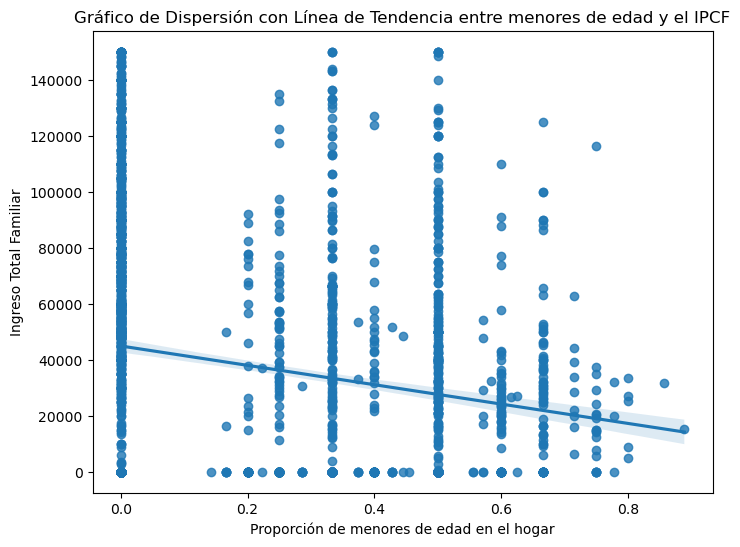

In [39]:
# Graficamos
plt.figure(figsize=(8, 6))
sns.regplot(x='prop_menores', y='IPCF', data=df_graph)
plt.title('Gráfico de Dispersión con Línea de Tendencia entre menores de edad y el IPCF')
plt.xlabel('Proporción de menores de edad en el hogar')
plt.ylabel('Ingreso Total Familiar')
plt.show()

### Inciso 6

In [40]:
# Se importa la base 'tabla_adulto_equiv.xlsx' para luego unirla a la base principal

df_adult_eq = pd.read_excel("tabla_adulto_equiv.xlsx", header=3, usecols="A:C", nrows=25)
df_adult_eq

,Edad,Mujeres,Varones
0,NaN,NaN,NaN
1,Menor de 1 año,0.35,0.35
2,1año,0.37,0.37
3,2 años,0.46,0.46
4,3 años,0.51,0.51
5,4 años,0.55,0.55
6,5 años,0.60,0.60
7,6 años,0.64,0.64
8,7 años,0.66,0.66
9,8 años,0.68,0.68


In [41]:
# Se reemplaza '1año' por '1 año' en la variable 'Edad' para que se pueda hacer un merge adecuado
df_adult_eq['Edad'] = df_adult_eq['Edad'].replace('1año', '1 año')
# Se elimina el único missing de la base debido al formato tabla en Excel
df_adult_eq = df_adult_eq.dropna(subset=['Edad'])
# Se elimina aquellos que tengan menos de 1 año debido a que no se tienen observaciones con esta característica
# en la base principal
df_adult_eq = df_adult_eq[df_adult_eq['Edad'] != "Menor de 1 año"]

In [42]:
# Se transforma la base a un formato long para que se pueda hacer un merge adecuado con la base principal
# para utilizar el sexo y la edad como variables identificadoras
df_adult_eq = pd.melt(df_adult_eq, id_vars=['Edad'], value_vars=['Varones', 'Mujeres'], var_name='Sexo')

In [43]:
# Se crea una nueva columna con el mismo nombre y formato que la base principal para poder hacer el merge
df_adult_eq.loc[df_adult_eq['Sexo'] == "Varones", 'CH04_2'] = 0
df_adult_eq.loc[df_adult_eq['Sexo'] == "Mujeres", 'CH04_2'] = 1
df_adult_eq['CH04_2'] = df_adult_eq['CH04_2'].astype('int64')
# Se renombra la variable 'value' a 'adulto_equiv'
df_adult_eq = df_adult_eq.rename(columns={'value': 'adulto_equiv'})

df_adult_eq

,Edad,Sexo,adulto_equiv,CH04_2
0,1 año,Varones,0.37,0
1,2 años,Varones,0.46,0
2,3 años,Varones,0.51,0
3,4 años,Varones,0.55,0
4,5 años,Varones,0.60,0
5,6 años,Varones,0.64,0
6,7 años,Varones,0.66,0
7,8 años,Varones,0.68,0
8,9 años,Varones,0.69,0
9,10 años,Varones,0.79,0


In [44]:
# Se genera la variable Edad en la base de datos df_eph
conditions = [
    (df_eph['CH06'] == 1),
    (df_eph['CH06'] == 2),
    (df_eph['CH06'] == 3),
    (df_eph['CH06'] == 4),
    (df_eph['CH06'] == 5),
    (df_eph['CH06'] == 6),
    (df_eph['CH06'] == 7),
    (df_eph['CH06'] == 8),
    (df_eph['CH06'] == 9),
    (df_eph['CH06'] == 10),
    (df_eph['CH06'] == 11),
    (df_eph['CH06'] == 12),
    (df_eph['CH06'] == 13),
    (df_eph['CH06'] == 14),
    (df_eph['CH06'] == 15),
    (df_eph['CH06'] == 16),
    (df_eph['CH06'] == 17),
    (df_eph['CH06'].between(18, 29, inclusive='both')),
    (df_eph['CH06'].between(30, 45, inclusive='both')),
    (df_eph['CH06'].between(46, 60, inclusive='both')),
    (df_eph['CH06'].between(61, 75, inclusive='both')),
    (df_eph['CH06'].between(76, 99, inclusive='both'))
]

values = [
    "1 año",
    "2 años",
    "3 años",
    "4 años",
    "5 años",
    "6 años",
    "7 años",
    "8 años",
    "9 años",
    "10 años",
    "11 años",
    "12 años",
    "13 años",
    "14 años",
    "15 años",
    "16 años",
    "17 años",
    "18 a 29 años",
    "30 a 45 años",
    "46 a 60 años",
    "61 a 75 años",
    "más de 75 años"
]

# Aplicar las condiciones y los valores a la nueva columna 'Edad'
df_eph['Edad'] = np.select(conditions, values, default='')

In [45]:
print(df_eph.columns.tolist())

['CODUSU', 'ANO4', 'TRIMESTRE', 'NRO_HOGAR', 'REALIZADA', 'REGION', 'MAS_500', 'PONDERA', 'II1', 'II2', 'IX_TOT', 'IX_MEN10', 'IX_MAYEQ10', 'ITF', 'DECIFR', 'RDECIFR', 'GDECIFR', 'ADECIFR', 'IPCF', 'DECCFR', 'RDECCFR', 'GDECCFR', 'ADECCFR', 'PONDIH', 'COMPONENTE', 'CH05', 'CH06', 'P21', 'DECOCUR', 'RDECOCUR', 'GDECOCUR', 'ADECOCUR', 'PONDIIO', 'TOT_P12', 'P47T', 'DECINDR', 'RDECINDR', 'GDECINDR', 'ADECINDR', 'PONDII', 'V2_M', 'V3_M', 'V4_M', 'V5_M', 'V8_M', 'V9_M', 'V10_M', 'V11_M', 'V12_M', 'V18_M', 'V21_M', 'T_VI', 'AGLOMERADO_33', 'IV1_2', 'IV1_3', 'IV1_4', 'IV1_6', 'IV2_2', 'IV2_3', 'IV2_4', 'IV2_5', 'IV2_6', 'IV2_7', 'IV2_8', 'IV2_9', 'IV2_99', 'IV3_2', 'IV3_3', 'IV3_4', 'IV4_2', 'IV4_3', 'IV4_4', 'IV4_5', 'IV4_6', 'IV4_7', 'IV4_9', 'IV5_2', 'IV6_2', 'IV6_3', 'IV7_2', 'IV7_3', 'IV7_4', 'IV8_2', 'IV9_1', 'IV9_2', 'IV10_1', 'IV10_2', 'IV10_3', 'IV11_1', 'IV11_2', 'IV11_3', 'IV11_4', 'IV12_1_2', 'IV12_2_2', 'IV12_3_2', 'II3_2', 'II4_1_1', 'II4_1_2', 'II4_2_1', 'II4_2_2', 'II4_3_1', '

In [46]:
# Realizamos el merge con la base principal
df_eph_equiv = pd.merge(df_eph, df_adult_eq, on=['Edad', 'CH04_2'], how='left')
df_eph_equiv

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,REALIZADA,REGION,MAS_500,PONDERA,II1,II2,...,PP02H_2,PP02I_1,PP02I_2,menores_edad,prop_menores,jh_primario_incompleto,conyug_trabaja,Edad,Sexo,adulto_equiv
0,TQRMNORVYHMOTSCDEIJAH00802517,2023,1,1,1,1,S,1066,4,2,...,0,0,0,0,0.00,0,0,46 a 60 años,Mujeres,0.76
1,TQRMNORVYHMOTSCDEIJAH00802517,2023,1,1,1,1,S,1066,4,2,...,0,0,0,0,0.00,0,0,18 a 29 años,Mujeres,0.76
2,TQRMNOSQRHLLTTCDEIJAH00719390,2023,1,1,1,1,S,2270,4,1,...,0,0,0,0,0.00,0,1,30 a 45 años,Varones,1.00
3,TQRMNOSQRHLLTTCDEIJAH00719390,2023,1,1,1,1,S,2270,4,1,...,0,0,0,0,0.00,0,1,30 a 45 años,Mujeres,0.77
4,TQSMNOSQRHLLTTCDEIJAH00719389,2023,1,1,1,1,S,2161,3,1,...,1,0,1,0,0.00,0,0,más de 75 años,Mujeres,0.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7135,TQRMNOSSQHKOOMCDEIJAH00802644,2023,1,1,1,1,S,3381,3,2,...,1,0,1,3,0.75,0,0,18 a 29 años,Mujeres,0.76
7136,TQRMNOSSQHKOOMCDEIJAH00802644,2023,1,1,1,1,S,3381,3,2,...,1,0,1,3,0.75,0,0,13 años,Mujeres,0.76
7137,TQRMNOSSQHKOOMCDEIJAH00802644,2023,1,1,1,1,S,3381,3,2,...,0,0,0,3,0.75,0,0,7 años,Varones,0.66
7138,TQRMNORYPHJKNPCDEIJAH00794297,2023,1,1,1,1,S,521,3,2,...,0,0,0,1,0.50,0,0,61 a 75 años,Mujeres,0.67


In [47]:
# Ahora se crea un data frame que contenga la suma de las necesidades energéticas de los miembros de cada hogar
ad_equiv_hogar = df_eph_equiv.groupby(['CODUSU', 'NRO_HOGAR'])['adulto_equiv'].sum().reset_index()
# Se cambia el nombre de la variable a 'ad_equiv_hogar'
ad_equiv_hogar = ad_equiv_hogar.rename(columns={'adulto_equiv':'ad_equiv_hogar'})
# Se realiza el merge con la base principal con las necesidades energéticas por hogar
df_eph_equiv = pd.merge(df_eph_equiv, ad_equiv_hogar, on=['CODUSU', 'NRO_HOGAR'], how='left')

df_eph_equiv

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,REALIZADA,REGION,MAS_500,PONDERA,II1,II2,...,PP02I_1,PP02I_2,menores_edad,prop_menores,jh_primario_incompleto,conyug_trabaja,Edad,Sexo,adulto_equiv,ad_equiv_hogar
0,TQRMNORVYHMOTSCDEIJAH00802517,2023,1,1,1,1,S,1066,4,2,...,0,0,0,0.00,0,0,46 a 60 años,Mujeres,0.76,1.52
1,TQRMNORVYHMOTSCDEIJAH00802517,2023,1,1,1,1,S,1066,4,2,...,0,0,0,0.00,0,0,18 a 29 años,Mujeres,0.76,1.52
2,TQRMNOSQRHLLTTCDEIJAH00719390,2023,1,1,1,1,S,2270,4,1,...,0,0,0,0.00,0,1,30 a 45 años,Varones,1.00,1.77
3,TQRMNOSQRHLLTTCDEIJAH00719390,2023,1,1,1,1,S,2270,4,1,...,0,0,0,0.00,0,1,30 a 45 años,Mujeres,0.77,1.77
4,TQSMNOSQRHLLTTCDEIJAH00719389,2023,1,1,1,1,S,2161,3,1,...,0,1,0,0.00,0,0,más de 75 años,Mujeres,0.63,0.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7135,TQRMNOSSQHKOOMCDEIJAH00802644,2023,1,1,1,1,S,3381,3,2,...,0,1,3,0.75,0,0,18 a 29 años,Mujeres,0.76,2.95
7136,TQRMNOSSQHKOOMCDEIJAH00802644,2023,1,1,1,1,S,3381,3,2,...,0,1,3,0.75,0,0,13 años,Mujeres,0.76,2.95
7137,TQRMNOSSQHKOOMCDEIJAH00802644,2023,1,1,1,1,S,3381,3,2,...,0,0,3,0.75,0,0,7 años,Varones,0.66,2.95
7138,TQRMNORYPHJKNPCDEIJAH00794297,2023,1,1,1,1,S,521,3,2,...,0,0,1,0.50,0,0,61 a 75 años,Mujeres,0.67,1.69


In [48]:
# Se crea una submuestra con los que respondieron sobre su ingreso total familiar
respondieron = df_eph_equiv.loc[df_eph_equiv['ITF'] != 0]
print(len(respondieron))

4181


In [49]:
# Ahora los que no respondieron
norespondieron = df_eph_equiv.loc[df_eph_equiv['ITF'] == 0]
print(len(norespondieron), 'personas no respondieron cuál es su ingreso total familiar')

2959 personas no respondieron cuál es su ingreso total familiar


In [50]:
# Agregamos la columna 'ingreso_necesario' la cual es resultado de multiplicar el valor de la Canasta Básica
# Total en GBA por las necesidades energéticas por hogar
respondieron['ingreso_necesario'] = respondieron['ad_equiv_hogar']*57371.05
respondieron

C:\Users\Rafael\AppData\Local\Temp\ipykernel_11344\11768579.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron['ingreso_necesario'] = respondieron['ad_equiv_hogar']*57371.05


,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,REALIZADA,REGION,MAS_500,PONDERA,II1,II2,...,PP02I_2,menores_edad,prop_menores,jh_primario_incompleto,conyug_trabaja,Edad,Sexo,adulto_equiv,ad_equiv_hogar,ingreso_necesario
2,TQRMNOSQRHLLTTCDEIJAH00719390,2023,1,1,1,1,S,2270,4,1,...,0,0,0.00,0,1,30 a 45 años,Varones,1.00,1.77,101546.7585
3,TQRMNOSQRHLLTTCDEIJAH00719390,2023,1,1,1,1,S,2270,4,1,...,0,0,0.00,0,1,30 a 45 años,Mujeres,0.77,1.77,101546.7585
4,TQSMNOSQRHLLTTCDEIJAH00719389,2023,1,1,1,1,S,2161,3,1,...,1,0,0.00,0,0,más de 75 años,Mujeres,0.63,0.63,36143.7615
5,TQRMNORTUHKOQQCDEIJAH00780489,2023,1,1,1,1,S,3097,3,1,...,1,0,0.00,0,0,más de 75 años,Mujeres,0.63,0.63,36143.7615
6,TQRMNOUTRHKNQMCDEIJAH00802590,2023,1,1,1,1,S,2571,2,1,...,0,0,0.00,0,0,30 a 45 años,Varones,1.00,1.00,57371.0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7135,TQRMNOSSQHKOOMCDEIJAH00802644,2023,1,1,1,1,S,3381,3,2,...,1,3,0.75,0,0,18 a 29 años,Mujeres,0.76,2.95,169244.5975
7136,TQRMNOSSQHKOOMCDEIJAH00802644,2023,1,1,1,1,S,3381,3,2,...,1,3,0.75,0,0,13 años,Mujeres,0.76,2.95,169244.5975
7137,TQRMNOSSQHKOOMCDEIJAH00802644,2023,1,1,1,1,S,3381,3,2,...,0,3,0.75,0,0,7 años,Varones,0.66,2.95,169244.5975
7138,TQRMNORYPHJKNPCDEIJAH00794297,2023,1,1,1,1,S,521,3,2,...,0,1,0.50,0,0,61 a 75 años,Mujeres,0.67,1.69,96957.0745


Se agrega la columna 'pobre' a la base 'respondieron'. Esta es una variable dummy que toma el valor 1 cuando el Ingreso Total Familiar es menor al ingreso necesario para cubrir las necesidades básicas y 0 si ocurre lo contrario.

In [51]:
respondieron['pobre'] = (respondieron['ITF'] < respondieron['ingreso_necesario']).astype(int)

C:\Users\Rafael\AppData\Local\Temp\ipykernel_11344\1131476788.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron['pobre'] = (respondieron['ITF'] < respondieron['ingreso_necesario']).astype(int)


### Inciso 7

#### Identificacion de hogares pobres

Primeramente, a efectos de poder contrastar con la predicción obtenida al final de la Parte III, se computa la cantidad de personas pobres.

In [52]:
# Identificamos pobres como en el TP3

pobres = (respondieron['pobre'] == 1).sum()
print('Se identificó a', pobres, 'personas pobres')

Se identificó a 1555 personas pobres


In [53]:
# Se crea una variable que identifica a los hogares, a partir de CODUSU (que identifica viviendas) y NRO_HOGAR (que identifica
# hogares dentro de una misma vivienda).
respondieron['id_hogar'] = respondieron['CODUSU'].astype(str) + '_' + respondieron['NRO_HOGAR'].astype(str)

C:\Users\Rafael\AppData\Local\Temp\ipykernel_11344\4117641682.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron['id_hogar'] = respondieron['CODUSU'].astype(str) + '_' + respondieron['NRO_HOGAR'].astype(str)


In [54]:
# Construimos otro dataset con un individuo por hogar
resp_hogares = respondieron.groupby('id_hogar').first().reset_index()
resp_hogares

,id_hogar,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,REALIZADA,REGION,MAS_500,PONDERA,II1,...,menores_edad,prop_menores,jh_primario_incompleto,conyug_trabaja,Edad,Sexo,adulto_equiv,ad_equiv_hogar,ingreso_necesario,pobre
0,TQRMNOPPQHJNOPCDEIJAH00802435_1,TQRMNOPPQHJNOPCDEIJAH00802435,2023,1,1,1,1,S,1667,5,...,0,0.000000,0,0,46 a 60 años,Varones,1.00,3.54,203093.5170,0
1,TQRMNOPPQHKMQRCDEIJAH00780809_1,TQRMNOPPQHKMQRCDEIJAH00780809,2023,1,1,1,1,S,3577,2,...,3,0.500000,0,1,30 a 45 años,Mujeres,0.77,4.48,257022.3040,1
2,TQRMNOPPQHLNKTCDEIIAD00780107_1,TQRMNOPPQHLNKTCDEIIAD00780107,2023,1,1,1,1,S,3536,2,...,1,0.333333,0,1,30 a 45 años,Mujeres,0.77,2.14,122774.0470,0
3,TQRMNOPPQHLOKTCDEIJAH00719666_1,TQRMNOPPQHLOKTCDEIJAH00719666,2023,1,1,1,1,S,196,1,...,0,0.000000,0,0,46 a 60 años,Varones,1.00,1.00,57371.0500,0
4,TQRMNOPPQHMKLSCDEIIAD00801791_1,TQRMNOPPQHMKLSCDEIIAD00801791,2023,1,1,1,1,S,80,3,...,1,0.500000,0,0,30 a 45 años,Mujeres,0.77,1.41,80893.1805,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1609,TQTMNOQWYHKNQLCDEIJAH00785853_1,TQTMNOQWYHKNQLCDEIJAH00785853,2023,1,1,1,1,S,2229,3,...,1,0.333333,0,1,30 a 45 años,Varones,1.00,2.59,148591.0195,0
1610,TQTMNORQXHMOSQCDEIJAH00802270_1,TQTMNORQXHMOSQCDEIJAH00802270,2023,1,1,1,1,S,3150,2,...,1,0.333333,0,1,46 a 60 años,Varones,1.00,3.03,173834.2815,1
1611,TQTMNORTQHLMNUCDEIJAH00793701_1,TQTMNORTQHLMNUCDEIJAH00793701,2023,1,1,1,1,S,1679,1,...,2,0.500000,0,1,30 a 45 años,Varones,1.00,3.58,205388.3590,0
1612,TQUMNOQTRHKMPSCDEIJAH00801913_1,TQUMNOQTRHKMPSCDEIJAH00801913,2023,1,1,1,1,S,2264,1,...,2,0.666667,0,0,30 a 45 años,Mujeres,0.77,2.17,124495.1785,1


In [55]:
#Tasa de pobreza para GBA
tasa_pobreza = np.average(resp_hogares['pobre'], weights=resp_hogares['PONDIH'])*100
print(f'La tasa de pobreza es de {tasa_pobreza:.2f}%')

La tasa de pobreza es de 28.32%


## Parte II: Construcción de funciones

Se modificaron las funciones del TP3 para cumplir con las especificaciones adicionales de la consigna actual. Ya se había dispuesto en el código anterior que _precision_ fuera parte del _output_ de _evalua_metodo_ y que se pudiese optimizar la cantidad de vecinos para la metodología de KNN utilizando _evalua_config_. En esta instancia se incluyeron además los verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos en el diccionario de _output_ de _evalua_metodo_, y se adaptaron las funciones _evalua_config_ y _evalua_multiples_metodos_ para permitir trabajar con las metodologías basadas en árboles que se incorporaron en el TP4. Una descripción más detallada de las funciones puede encontrarse en el PDF de la entrega.

### Inciso 1

In [56]:
def evalua_metodo (model, X_train, X_test, Y_train, Y_test, pond=None):
    """
    Genera métricas de evaluación para tareas de clasificación dados un modelo ya configurado y bases de datos
    
    Input: el modelo (una instancia ya declarada con las configuraciones ya especificadas), llamado model; dataframes con las
    muestras de entrenamiento (X_train y y_train para explicativas y dependiente, respectivamente) y prueba (X_test y y_test para
    explicativas y dependiente, respectivamente); un dataframe de una sola columna con una variable de ponderaciones llamada pond
    
    Output: Un diccionario con todos los outputs asociados a una "key": "Matriz de confusión" (matriz de 2x2); "Visualización
    matriz de confusión" y "Gráfico de curva de ROC" (imágenes en formato .png); 9 métricas adicionales ("Verdaderos positivos",
    "Verdaderos negativos", "Falsos positivos" y "Falsos negativos" como "ints", junto a AUC, Accuracy, Precision o Valor
    predictivo positivo, Valor predictivo negativo y ECM como "floats"); "Coeficientes" es un NumPy array con toods los
    coeficientes.
    """  

    # Se ajusta el clasificador con la muestra de entrenamiento. Si se está utilizando una regresión logística y se tienen
    # ponderaciones, éstas se utilizan en el ajuste
    if isinstance(model, LogisticRegression) and pond is not None:
        model.fit(X_train, Y_train, sample_weight=pond)
    else:
        model.fit(X_train, Y_train)
        
    # Se genera la predicción para la muestra de prueba
    Y_pred = model.predict(X_test)
    
    # Se genera un array con los coeficientes
    if isinstance(model, (LogisticRegression, LinearDiscriminantAnalysis)):
        coefs = model.coef_
    else:
        coefs = np.empty((0))
    
    # Métricas:
    # Matriz de confusión
    mat_conf = confusion_matrix(Y_test, Y_pred)
    # Visualización gráfica de matriz de confusión
    disp = ConfusionMatrixDisplay(confusion_matrix=mat_conf, display_labels=model.classes_)
    disp.plot()
    plt.savefig('confusion_matrix.png')
    plt.close()
    # AUC score
    auc = roc_auc_score(Y_test, Y_pred)
    # Gráfico de curva ROC
    fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)
    display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name='Curva ROC')
    display.plot()
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.savefig('roc_curve.png')  
    plt.close()
    # Accuracy
    accuracy = accuracy_score(Y_test, Y_pred)
    # Valor Predictivo Positivo (VPP)
    vpp = precision_score(Y_test, Y_pred)
    # Valor Predictivo Negativo (VPN)
    tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred).ravel()
    vpn = tn / (tn + fn)
    # Error Cuadrático Medio (ECM)
    ecm = mean_squared_error(Y_test, Y_pred)

    # Especifica y estructur el output
    return {
        'Matriz de confusión': mat_conf,
        'Visualización de matriz de confusión': 'confusion_matrix.png',
        'Gráfico de curva ROC': 'roc_curve.png',
        'Verdaderos positivos': tp,
        'Verdaderos negativos': tn,
        'Falsos positivos': fp,
        'Falsos negativos': fn,
        'AUC': auc,
        'Accuracy': accuracy,
        'Precision/VPP': vpp,
        'VPN': vpn,
        'ECM': ecm,
        'Coeficientes': coefs
    }

### Inciso 2

In [57]:
def cross_validation (model, X, Y, pond=None, K_cv=10, stand=True, met='ECM', seed=74):
    
    """
    Computa el error promedio (de acuerdo alguna medida de error a especificar) para un modelo de clasificación aplicando cross-
    validation
    
    Input: el modelo (una instancia ya declarada con las configuraciones ya especificadas), llamado "model", tres dataframes
    (llamados "X", "Y" y "pond") con las variables explicativas, la explicada y una variable de ponderaciones, ints que definen
    la semilla y el K de K-Fold cross-validation ("seed" y "K_cv", respectivamente), strings que definen la métrica que se
    define como error y la opción de estandarización (llamados "met" y "stand", respectivamente)
    
    Output: El error promedio como, una lista de errores llamada "errors", un dataframe con los}
    coeficientes llamado "coefs"
    """  
# Se generan las particiones con la función KFold
    kf = KFold(n_splits=K_cv, shuffle=True, random_state=seed)
    
    # Se inicializa un numpy array vacío
    coefs = np.empty((0, 0))
    
    # Genera un vector con los errores para cada partición
    error = []
    for i, (train_index, test_index) in enumerate(kf.split(X)):   
        X_train, X_test = X.iloc[list(train_index)], X.iloc[list(test_index)]
        Y_train, Y_test = Y.iloc[list(train_index)], Y.iloc[list(test_index)]
        if pond is None:
            pond_train = None
        else:
            pond_train = pond.iloc[list(train_index)]
                
        # Se estandarizan, si corresponde, las observaciones de entrenamiento y prueba por separado
        sc = StandardScaler()
        if stand==True:
            X_train = pd.DataFrame(sc.fit_transform(X_train),index=X_train.index, columns=X_train.columns)
            X_test = pd.DataFrame(sc.transform(X_test),index=X_test.index, columns=X_test.columns)

        
        # Se obtiene la medida de error, que corresponde a un output de evalua_metodo, contemplando distintos casos según la 
        # medición del error elegida
        eval_m = evalua_metodo(model, X_train, X_test, Y_train, Y_test, pond_train)
        if met=='ECM':
            err = eval_m[met]
        else:
            err = 1-eval_m[met]
        error.append(err)
        
        # Se incorpora a "coefs" el array de coeficientes
        coefs_0 = eval_m['Coeficientes']
        if coefs.size == 0:
            coefs = coefs_0.reshape(1, -1)
        else:
            coefs = np.vstack((coefs, coefs_0))

    # Genera como output el promedio de los errores para las K particiones
    return statistics.mean(error), error, coefs

### Inciso 3

In [58]:
def evalua_config (model, X, Y, lambda_list, elastic_list, neighbor_list, depth_list, bag_list, forest_list, boost_list, pond=None, K_cv=10, met='ECM', seed=74, stand=True):
    '''
    Elige el/los hiperparámetro(s) que minimizan (alguna medida de) el error para los métodos LogisticRegression y
    KNeighborsClassifier
    
    Input: el modelo (una instancia ya declarada con las configuraciones ya especificadas), llamado "model", tres dataframes
    (llamados "X", "Y" y "pond") con las variables explicativas, la explicada y una variable de ponderaciones, ints que definen
    la semilla y el K de K-Fold cross-validation ("seed" y "K_cv", respectivamente), strings que definen la métrica que se
    define como error y la opción de estandarización (llamados "met" y "stand", respectivamente); listas con hiperparámetros
    llamadas "lambda_list", "elastic_list", "neighbor_list", "depth_list", "bag_list", "forest_list" y "boost_list".
    
    Output: tupla con el/los hiperparámetro(s) que minimizan el error y el error que se obtiene con ellos, una lista de errores 
    promedio por (combinación de) hiperparámetro(s) llamada "errs", otra lista de errores promedio para cada partición, por
    (combinación de) hiperparámetros(s) llamada "errors", y un dataframe con coeficients llamados "coefs".
    '''
    # Fija "stand" en True
    # stand = True
    
    # Inicializa listas con los errores y coeficientes
    errs = []
    errors = []
    coefs = []
    
    # Obtiene un error para cada lambda y cada l1_ratio si se usa el método de regresión logística
    if isinstance(model, LogisticRegression):
        for lamb in lambda_list:
            for ratio in elastic_list:
                mod = LogisticRegression(C=1/lamb, penalty="elasticnet", solver="saga", l1_ratio=ratio, tol=1e-2, random_state=seed)
                err, error, coefs_0 = cross_validation(mod, X, Y, pond, K_cv, stand, met, seed)
                errs.append((lamb, ratio, err))
                errors.append((lamb, ratio, error))
                # Se incorpora a "coefs" el array de coeficientes
                coefs.append(coefs_0)
                
    # Obtiene un error para cada cantidad de vecinos si se usa el método de KNN
    elif isinstance(model, KNeighborsClassifier):
        for K in neighbor_list:
            mod = KNeighborsClassifier(n_neighbors=K)
            err, error, coefs_0 = cross_validation(mod, X, Y, pond, K_cv, stand, met, seed)
            errs.append((K, err))
            errors.append((K, error))
    
    # Obtiene un error para cada profundidad máxima si se usa un árbol de decisión
    elif isinstance(model, DecisionTreeClassifier):
        #max_attributes = len(list(X))
        #depth_range = range(1, max_attributes + 1)
        for depth in depth_list:
            mod = DecisionTreeClassifier(max_depth = depth, random_state = seed)
            err, error, coefs_0 = cross_validation(mod, X, Y, pond, K_cv, stand, met, seed)
            errs.append((depth, err))
            errors.append((depth, error))
            
    # Obtiene un error para cada cantidad de árboles construidos a partir de remuestreos si se usa Bagging
    elif isinstance(model, BaggingClassifier):
        for B in bag_list:
            mod = BaggingClassifier(n_estimators=B, random_state = seed)
            err, error, coefs_0 = cross_validation(mod, X, Y, pond, K_cv, stand, met, seed)
            errs.append((B, err))
            errors.append((B, error))
            
    # Obtiene un error para cada cantidad de árboles construidos a partir de remuestreos si se usa Random Forests
    elif isinstance(model, RandomForestClassifier):
        for B in forest_list:
            mod = RandomForestClassifier(n_estimators=B, random_state = seed)
            err, error, coefs_0 = cross_validation(mod, X, Y, pond, K_cv, stand, met, seed)
            errs.append((B, err))
            errors.append((B, error))
            
    # Obtiene un error para cada cantidad máxima de árboles si se usa Boosting
    elif isinstance(model, AdaBoostClassifier):
        for B in boost_list:
            mod = AdaBoostClassifier(n_estimators=B, random_state = seed)
            err, error, coefs_0 = cross_validation(mod, X, Y, pond, K_cv, stand, met, seed)
            errs.append((B, err))
            errors.append((B, error))
            
    # Convierte a coefs de lista de arrays a array
    if coefs:
        coefs = np.array(coefs)
    
    # Genera el output
    return min(errs, key=lambda x: x[-1]), errs, errors, coefs

### Inciso 4

In [59]:
def evalua_multiples_metodos (method_list, X_train, X_test, Y_train, Y_test, lambda_list, elastic_list, neighbor_list, depth_list, bag_list, forest_list, boost_list, pond=None, K_cv=10, met='ECM', seed=74, stand=True):
    '''
    Construye una tabla que muestra, para cada método evaluado, la configuración óptima del modelo (dentro de las opciones
    provistas) y sus métricas de desempeño
    
    Input: lista de métodos, muestras de entrenamiento y prueba, una variable de ponderaciones, la métrica que se define como
    "error", una semilla para cross-validation y listas con hiperparámetros a optimizar
    
    Output: Tabla con métodos, configuraciones y métricas
    '''  
    # Se incializa la tabla, con "Método" (columna que incluirá texto especificando los hiperparámetros elegidos, en los casos
    # en que es apropiado) y métricas de desempeño
    metr_metodos = pd.DataFrame(columns=['Método','Configuración', 'Matriz de confusión','Verdaderos positivos','Verdaderos negativos','Falsos positivos','Falsos negativos','AUC', 'Accuracy','Precision/VPP','VPN','ECM'])
    
    #Se inicializa una matriz que guarda los hiperparámetros
    hiperps = np.zeros((6, 2))
    
    # For loop que construye cada fila de la tabla
    for index, method in enumerate(method_list):
        # Registra método e inicializa la configuración en "—", su valor por defecto
        metr_metodos.loc[index, 'Método'] = method
        metr_metodos.loc[index, 'Configuración'] = '—'
        
        #Obtiene la clase de sklearn que le corresponde a la entrada de la lista de métodos
        try:
            model_class = globals()[method]
        except KeyError:
            raise ValueError(f"La siguiente clase no existe/no ha sido importada: {method}")
        
        # Configura el modelo a ajustar   
        model = model_class()
        
        # Si es una regresión logística, obtiene el lambda y el l1_ratio óptimos y vuelve a configurar el modelo
        if method=='LogisticRegression':
            # Obtiene hiperparámetros  y los guarda en la matriz
            optim, errs, errors, coefs = evalua_config(model, X_train, Y_train, lambda_list, elastic_list, neighbor_list, depth_list, bag_list, forest_list, boost_list, pond, K_cv, met, seed, stand)
            val_lambda = optim[0]
            hiperps[0,0] = val_lambda
            l_ratio = optim[1]
            hiperps[0,1] = l_ratio
            # Define qué tipo de regularización resultó óptima
            if l_ratio==1:
                regul = 'LASSO'
            elif l_ratio==0:
                regul = 'Ridge'
            else:
                regul = f' EN (l1_ratio = {l_ratio})'
            # Actualiza configuración del método en la tabla
            metr_metodos.loc[index, 'Configuración'] = f' Regularización {regul}, Lambda = {val_lambda}'
            # Actualiza configuración del modelo a ajustar
            model = LogisticRegression(C=1/val_lambda, penalty="elasticnet", solver="saga", l1_ratio=l_ratio, tol=1e-2, random_state=seed)
            
        
        # Si es KNN, obtiene el número óptimo de vecinos y vuelve a configurar el modelo
        elif method=='KNeighborsClassifier':
            # Obtiene hiperparámetro óptimo
            optim, errs, errors, coefs = evalua_config(model, X_train, Y_train, lambda_list, elastic_list, neighbor_list, depth_list, bag_list, forest_list, boost_list, pond, K_cv, met, seed, stand)
            K_knn = optim[0]
            hiperps[1,0] = K_knn
            # Actualiza configuración del método en la tabla
            metr_metodos.loc[index, 'Configuración'] = f' (Vecinos = {K_knn})'
            # Actualiza configuración del modelo a ajustar
            model = KNeighborsClassifier(n_neighbors=K_knn)
            
        # Si es un árbol de decisión, obtiene la profundidad máxima óptima y vuelve a configurar el modelo
        elif method=='DecisionTreeClassifier':
            # Obtiene hiperparámetro óptimo
            optim, errs, errors, coefs = evalua_config(model, X_train, Y_train, lambda_list, elastic_list, neighbor_list, depth_list, bag_list, forest_list, boost_list, pond, K_cv, met, seed, stand)
            depth = optim[0]
            hiperps[2,0] = depth
            # Actualiza configuración del método en la tabla
            metr_metodos.loc[index, 'Configuración'] = f' (Profundidad = {depth})'
            # Actualiza configuración del modelo a ajustar
            model = DecisionTreeClassifier(max_depth = depth, random_state = seed)            
        
        # Si es Bagging, obtiene el número óptimo de árboles y vuelve a configurar el modelo
        elif method=='BaggingClassifier':
            # Obtiene hiperparámetro óptimo
            optim, errs, errors, coefs = evalua_config(model, X_train, Y_train, lambda_list, elastic_list, neighbor_list, depth_list, bag_list, forest_list, boost_list, pond, K_cv, met, seed, stand)
            B_bag = optim[0]
            hiperps[3,0] = B_bag
            # Actualiza configuración del método en la tabla
            metr_metodos.loc[index, 'Configuración'] = f' (B de Bagging = {B_bag})'
            # Actualiza configuración del modelo a ajustar
            model = BaggingClassifier(n_estimators=B_bag, random_state = seed)
            
        # Si es Random Forest, obtiene el número óptimo de árboles y vuelve a configurar el modelo
        elif method=='RandomForestClassifier':
            # Obtiene hiperparámetro óptimo
            optim, errs, errors, coefs = evalua_config(model, X_train, Y_train, lambda_list, elastic_list, neighbor_list, depth_list, bag_list, forest_list, boost_list, pond, K_cv, met, seed, stand)
            B_rf = optim[0]
            hiperps[4,0] = B_rf
            # Actualiza configuración del método en la tabla
            metr_metodos.loc[index, 'Configuración'] = f' (B de Random Forest = {B_rf})'
            # Actualiza configuración del modelo a ajustar
            model = RandomForestClassifier(n_estimators=B_rf, random_state = seed)
            
        # Si es AdaBoost, obtiene el máximo de árboles que resulta óptimo y vuelve a configurar el modelo
        elif method=='AdaBoostClassifier':
            # Obtiene hiperparámetro óptimo
            optim, errs, errors, coefs = evalua_config(model, X_train, Y_train, lambda_list, elastic_list, neighbor_list, depth_list, bag_list, forest_list, boost_list, pond, K_cv, met, seed, stand)
            B_ab = optim[0]
            hiperps[5,0] = B_ab
            # Actualiza configuración del método en la tabla
            metr_metodos.loc[index, 'Configuración'] = f' (B de Random Forest = {B_ab})'
            # Actualiza configuración del modelo a ajustar
            model = AdaBoostClassifier(n_estimators=B_ab, random_state = seed)
        
        # Antes del ajuste final, se estandarizan, si corresponde, las observaciones de entrenamiento y prueba por separado
        sc = StandardScaler()
        if stand==True:
            X_train = pd.DataFrame(sc.fit_transform(X_train),index=X_train.index, columns=X_train.columns)
            X_test = pd.DataFrame(sc.transform(X_test),index=X_test.index, columns=X_test.columns)

        
        # Obtiene las medidas de desempeño para el método
        eval_m = evalua_metodo(model, X_train, X_test, Y_train, Y_test, pond)
        #print(eval_m)
        #metr_metodos.loc[index, ('Matriz de confusión', 'AUC', 'Accuracy', 'VPP', 'VPN', 'ECM')] = eval_m[index, ('Matriz de confusión', 'AUC', 'Accuracy', 'VPP', 'VPN', 'ECM')]
        metr_metodos.loc[index, ('Matriz de confusión','Verdaderos positivos','Verdaderos negativos','Falsos positivos','Falsos negativos','AUC', 'Accuracy', 'Precision/VPP', 'VPN', 'ECM')] = (
            eval_m['Matriz de confusión'],
            eval_m['Verdaderos positivos'],
            eval_m['Verdaderos negativos'],
            eval_m['Falsos positivos'],
            eval_m['Falsos negativos'],
            eval_m['AUC'],
            eval_m['Accuracy'],
            eval_m['Precision/VPP'],
            eval_m['VPN'],
            eval_m['ECM']
        )

    return metr_metodos, hiperps

## Parte III: Clasificación y regularización

### Inciso 1

#### Eliminación de variables
Se eliminaron las variables requeridas por la consigna, junto con algunas variables adicionales para la base _respondieron_, que serán eliminadas más adelante para _norespondieron_. Una explicación más detallada puede encontrarse en el documento de entrega.

In [60]:
# Eliminamos las variables de ingresos para los que respondieron
#columnas_a_eliminar = ['V2_M', 'V3_M', 'V4_M', 'V5_M', 'V8_M', 'V9_M', 'V10_M', 'V11_M', 'V12_M', 'V18_M', 'V21_M', 'T_VI',
#                       'P47T', 'TOT_P12', 'P21', 'IPCF', 'ITF']

columnas_a_eliminar = ['V2_M', 'V3_M', 'V4_M', 'V5_M', 'V8_M', 'V9_M', 'V10_M', 'V11_M', 'V12_M', 'V18_M', 'V21_M', 'T_VI',
                       'P47T','TOT_P12', 'P21', 'IPCF', 'ITF','DECCFR', 'RDECCFR', 'GDECCFR', 'ADECCFR','DECINDR','RDECINDR',
                       'GDECINDR', 'ADECINDR','DECOCUR','RDECOCUR','GDECOCUR','ADECOCUR', 'DECIFR', 'RDECIFR','GDECIFR',
                       'ADECIFR']
respondieron.drop(columnas_a_eliminar, axis=1, inplace=True)
norespondieron.drop(columnas_a_eliminar, axis=1, inplace=True)
#respondieron.drop(exc_var_list1, axis=1, inplace=True)
#'IDECCFR', 'PDECCFR', 'IDECINDR', 'PDECINDR', 'PP06A', 'PP06C', 'PP06D', 'PP06E', 'PP06H', 'PP08D1', 'PP08D4', 'PP08F1', 'PP08F2', 'PP08J1', 'PP08J2 ', 'PP08J3', 'IDECOCUR', 'PDECOCUR', 'IDECIFR', 'PDECIFR'

C:\Users\Rafael\AppData\Local\Temp\ipykernel_11344\2082103715.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron.drop(columnas_a_eliminar, axis=1, inplace=True)
C:\Users\Rafael\AppData\Local\Temp\ipykernel_11344\2082103715.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  norespondieron.drop(columnas_a_eliminar, axis=1, inplace=True)


In [61]:
# Eliminamos las otras variables pedidas
columnas_a_eliminar = ['adulto_equiv', 'ad_equiv_hogar','ingreso_necesario']
respondieron.drop(columnas_a_eliminar, axis=1, inplace=True)

C:\Users\Rafael\AppData\Local\Temp\ipykernel_11344\3226360250.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron.drop(columnas_a_eliminar, axis=1, inplace=True)


In [62]:
# Checkeamos que esten borradas
# respondieron.to_excel('respondieron2.xlsx', sheet_name='Hoja1', index=False)
respondieron.head(5)

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,REALIZADA,REGION,MAS_500,PONDERA,II1,II2,...,PP02I_1,PP02I_2,menores_edad,prop_menores,jh_primario_incompleto,conyug_trabaja,Edad,Sexo,pobre,id_hogar
2,TQRMNOSQRHLLTTCDEIJAH00719390,2023,1,1,1,1,S,2270,4,1,...,0,0,0,0.0,0,1,30 a 45 años,Varones,0,TQRMNOSQRHLLTTCDEIJAH00719390_1
3,TQRMNOSQRHLLTTCDEIJAH00719390,2023,1,1,1,1,S,2270,4,1,...,0,0,0,0.0,0,1,30 a 45 años,Mujeres,0,TQRMNOSQRHLLTTCDEIJAH00719390_1
4,TQSMNOSQRHLLTTCDEIJAH00719389,2023,1,1,1,1,S,2161,3,1,...,0,1,0,0.0,0,0,más de 75 años,Mujeres,0,TQSMNOSQRHLLTTCDEIJAH00719389_1
5,TQRMNORTUHKOQQCDEIJAH00780489,2023,1,1,1,1,S,3097,3,1,...,0,1,0,0.0,0,0,más de 75 años,Mujeres,0,TQRMNORTUHKOQQCDEIJAH00780489_1
6,TQRMNOUTRHKNQMCDEIJAH00802590,2023,1,1,1,1,S,2571,2,1,...,0,0,0,0.0,0,0,30 a 45 años,Varones,0,TQRMNOUTRHKNQMCDEIJAH00802590_1


In [63]:
# Eliminamos las variables de ingresos para los que respondieron
#columnas_a_eliminar = ['V2_M', 'V3_M', 'V4_M', 'V5_M', 'V8_M', 'V9_M', 'V10_M', 'V11_M', 'V12_M', 'V18_M', 'V21_M', 'T_VI', 'P47T', 'TOT_P12', 'P21', 'IPCF', 'ITF']
#columnas_a_eliminar = ['V2_M', 'V3_M', 'V4_M', 'V5_M', 'V8_M', 'V9_M', 'V10_M', 'V11_M', 'V12_M', 'V18_M', 'V21_M', 'T_VI',
#                       'P47T','TOT_P12', 'P21', 'IPCF', 'ITF','DECCFR', 'RDECCFR', 'GDECCFR', 'ADECCFR','DECINDR','RDECINDR',
#                       'GDECINDR', 'ADECINDR', 'PP06E','DECOCUR','RDECOCUR','GDECOCUR','ADECOCUR', 'DECIFR', 'RDECIFR',
#                       'GDECIFR','ADECIFR']
#norespondieron.drop(columnas_a_eliminar, axis=1, inplace=True)
#norespondieron.drop(columnas_a_eliminar, axis=1, inplace=True)

In [64]:
# Eliminamos las otras variables pedidas
columnas_a_eliminar = ['adulto_equiv', 'ad_equiv_hogar']
norespondieron.drop(columnas_a_eliminar, axis=1, inplace=True)

C:\Users\Rafael\AppData\Local\Temp\ipykernel_11344\2462317523.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  norespondieron.drop(columnas_a_eliminar, axis=1, inplace=True)


In [65]:
# Checkeamos que esten borradas
# norespondieron.to_excel('norespondieron2.xlsx', sheet_name='Hoja1', index=False)
norespondieron.head(5)

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,REALIZADA,REGION,MAS_500,PONDERA,II1,II2,...,PP02H_1,PP02H_2,PP02I_1,PP02I_2,menores_edad,prop_menores,jh_primario_incompleto,conyug_trabaja,Edad,Sexo
0,TQRMNORVYHMOTSCDEIJAH00802517,2023,1,1,1,1,S,1066,4,2,...,0,0,0,0,0,0.000000,0,0,46 a 60 años,Mujeres
1,TQRMNORVYHMOTSCDEIJAH00802517,2023,1,1,1,1,S,1066,4,2,...,0,0,0,0,0,0.000000,0,0,18 a 29 años,Mujeres
20,TQRMNOSPWHMMQTCDEIJAH00802591,2023,1,1,1,1,S,1522,5,3,...,0,0,0,0,3,0.428571,0,0,18 a 29 años,Varones
21,TQRMNOSPWHMMQTCDEIJAH00802591,2023,1,1,1,1,S,1522,5,3,...,0,1,0,1,3,0.428571,0,0,18 a 29 años,Mujeres
22,TQRMNOSPWHMMQTCDEIJAH00802591,2023,1,1,1,1,S,1522,5,3,...,0,1,0,1,3,0.428571,0,0,13 años,Varones


In [66]:
# Se muestran las columnas restantes
column_names = respondieron.columns.tolist()
print(column_names)

['CODUSU', 'ANO4', 'TRIMESTRE', 'NRO_HOGAR', 'REALIZADA', 'REGION', 'MAS_500', 'PONDERA', 'II1', 'II2', 'IX_TOT', 'IX_MEN10', 'IX_MAYEQ10', 'PONDIH', 'COMPONENTE', 'CH05', 'CH06', 'PONDIIO', 'PONDII', 'AGLOMERADO_33', 'IV1_2', 'IV1_3', 'IV1_4', 'IV1_6', 'IV2_2', 'IV2_3', 'IV2_4', 'IV2_5', 'IV2_6', 'IV2_7', 'IV2_8', 'IV2_9', 'IV2_99', 'IV3_2', 'IV3_3', 'IV3_4', 'IV4_2', 'IV4_3', 'IV4_4', 'IV4_5', 'IV4_6', 'IV4_7', 'IV4_9', 'IV5_2', 'IV6_2', 'IV6_3', 'IV7_2', 'IV7_3', 'IV7_4', 'IV8_2', 'IV9_1', 'IV9_2', 'IV10_1', 'IV10_2', 'IV10_3', 'IV11_1', 'IV11_2', 'IV11_3', 'IV11_4', 'IV12_1_2', 'IV12_2_2', 'IV12_3_2', 'II3_2', 'II4_1_1', 'II4_1_2', 'II4_2_1', 'II4_2_2', 'II4_3_1', 'II4_3_2', 'II5_2', 'II6_2', 'II7_1', 'II7_2', 'II7_3', 'II7_4', 'II7_5', 'II7_6', 'II7_7', 'II7_8', 'II7_9', 'II8_1', 'II8_2', 'II8_3', 'II8_4', 'II9_1', 'II9_2', 'II9_3', 'II9_4', 'V1_2', 'V1_9', 'V2_2', 'V2_9', 'V21_2', 'V22_2', 'V3_2', 'V3_9', 'V4_2', 'V4_9', 'V5_2', 'V5_9', 'V6_2', 'V6_9', 'V7_2', 'V7_9', 'V8_2', 'V8

In [67]:
#Eliminamos otras variables
respondieron = respondieron.drop(columns=['CH05','CODUSU', 'ANO4','TRIMESTRE','NRO_HOGAR','COMPONENTE','REALIZADA','MAS_500','REGION','Sexo','Edad','PONDERA','PONDII','PONDIIO','id_hogar'])


#### Separación de la base en dependiente, independientes y ponderadores.
Se separa a la muestra _respondieron_ en tres: variable dependiente ($y$), variables explicativas ($X$) y ponderadores ($ponds\_resp$).

In [68]:
# La variable pobre es la dependiente y el resto con constante igual a 1
y = respondieron['pobre']
X = respondieron.drop(['pobre', 'PONDIH'], axis=1)
ponds_resp = respondieron['PONDIH']
X['Constante']=1
X.head(5)

,II1,II2,IX_TOT,IX_MEN10,IX_MAYEQ10,CH06,AGLOMERADO_33,IV1_2,IV1_3,IV1_4,...,PP02E_5,PP02H_1,PP02H_2,PP02I_1,PP02I_2,menores_edad,prop_menores,jh_primario_incompleto,conyug_trabaja,Constante
2,4,1,2,0,2,36,1,1,0,0,...,0,0,0,0,0,0,0.0,0,1,1
3,4,1,2,0,2,38,1,1,0,0,...,0,0,0,0,0,0,0.0,0,1,1
4,3,1,1,0,1,80,1,0,0,0,...,0,0,1,0,1,0,0.0,0,0,1
5,3,1,1,0,1,85,1,0,0,0,...,0,0,1,0,1,0,0.0,0,0,1
6,2,1,1,0,1,45,1,0,0,0,...,0,0,0,0,0,0,0.0,0,0,1


### Inciso 2

#### Separación en muestra de entrenamiento y testeo

Se separó a $X$, $y$ y $ponds\_resp$ en entrenamiento y testeo, fijando en 30% la proporción que le corresponde a la submuestra de testeo.

In [69]:
# Se parte la base en una muestra de entrenamiento y otra de prueba (se usan 30% de los datos, al igual que en el TP2)
X_train, X_test, y_train, y_test, ponds_train, ponds_test = train_test_split(X, y, ponds_resp, test_size=0.3, random_state=74)

#### Primera corrida de _evalua_multiples_metodos_.

A continuación se corre la función _evalua_multiples_metodos_ para obtener los resultados de predecir en la muestra de prueba con la muestra de entrenamiento utilizando tres metodologías: regresión logística (en adelante RL), K vecinos más cercanos (KVC) y análisis discriminante lineal (ADL). Para RL se eligieron 3 valores de $\lambda$ (1, 5 y 10) y tres tipos de regularización (LASSO, Ridge o Elastic Nets; para esta última se eligió un _l_ratio_ de 0,5), eligiéndose modelo que mejor ajusta en la muestra de entrenamiento (según un análisis de validación cruzada) de entre todas las combinaciones de tipo de regularización e hiperparámetros $\lambda$. A su vez, se eligió la cantidad de vecinos que mejor predice, también aplicando un análisis de validación cruzada, para KVC, considerando cantidades de vecinos del 1 al 10.

In [70]:
# Se preparan los demás insumos para la función evalua_multiples_metodos

# Lista de métodos
metodos_eval=['LogisticRegression','KNeighborsClassifier','LinearDiscriminantAnalysis','DecisionTreeClassifier',
              'BaggingClassifier','RandomForestClassifier','AdaBoostClassifier']

# Lista de valores del hiperparámetro lambda
vals_lambda_0 = np.concatenate([10**np.linspace(-5, 5, 11), [5]])

# Lista de valores del hiperparámetros l1_ratio
elastics_0 = [0,0.5,1]

# Lista de posibles valores K para KNN: todos los números naturales del 1 al 10
vecinos_0 = [i for i in range(1, 10)]

# Lista de posibles profundidades máximas para el árbol de decisión: todos los números naturales del 1 a la cantidad de
# variables explicativas si ésta es menor a 20, y todos los múltiplos de 10 iguales o menores a la cantidad de variables
# explicativas si ésta es igual o mayor a 20.
max_attributes = X_train.shape[1]
if max_attributes <= 19:
    depths_0 = list(range(1, max_attributes,1))
else:
    nearest_mult = (max_attributes // 10) * 10
    depths_0 = list(range(10, nearest_mult,10))

#depths_0 = range(1, max_attributes + 1)
    
#step = 1 if max_attributes <= 19 else 10
#nearest_multiple_of_10 = (max_attributes // 10) * 10
#depths_0 = list(range(10, nearest_multiple_of_10 + 1, step))


# Lista de posibles números de árboles para Bagging
bag_estimators_0 = list(range(10, 101, 10))

# Lista de posibles números de árboles para Random Forest
forest_trees_0 = list(range(10, 101, 10))

# Lista de posibles números máximos de árboles para AdaBoost
boost_trees_0 = list(range(10, 101, 10))

In [71]:
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Se evalúan los 3 métodos considerados, dadas las listas de hiperparámetros definidas arriba. Se permite que K_cv, met y seed
# tomen su valor establecido por defecto
primera_eval, hiperps = evalua_multiples_metodos(metodos_eval, X_train, X_test, y_train, y_test, vals_lambda_0, elastics_0, vecinos_0, depths_0, bag_estimators_0, forest_trees_0, boost_trees_0, ponds_train)
primera_eval

,Método,Configuración,Matriz de confusión,Verdaderos positivos,Verdaderos negativos,Falsos positivos,Falsos negativos,AUC,Accuracy,Precision/VPP,VPN,ECM
0,LogisticRegression,"Regularización EN (l1_ratio = 0.5), Lambda =...","[[673, 126], [146, 310]]",310,673,126,146,0.761064,0.783267,0.711009,0.821734,0.216733
1,KNeighborsClassifier,(Vecinos = 1),"[[728, 71], [104, 352]]",352,728,71,104,0.841534,0.860558,0.832151,0.875,0.139442
2,LinearDiscriminantAnalysis,—,"[[725, 74], [132, 324]]",324,725,74,132,0.808955,0.835857,0.81407,0.845974,0.164143
3,DecisionTreeClassifier,(Profundidad = 20),"[[703, 96], [67, 389]]",389,703,96,67,0.86646,0.87012,0.802062,0.912987,0.12988
4,BaggingClassifier,(B de Bagging = 80),"[[759, 40], [59, 397]]",397,759,40,59,0.910276,0.921116,0.908467,0.927873,0.078884
5,RandomForestClassifier,(B de Random Forest = 90),"[[771, 28], [95, 361]]",361,771,28,95,0.878311,0.901992,0.928021,0.8903,0.098008
6,AdaBoostClassifier,(B de Random Forest = 50),"[[712, 87], [138, 318]]",318,712,87,138,0.794241,0.820717,0.785185,0.837647,0.179283


In [90]:
hiperps[0,0]

0.1

#### Medias no escalares de desempeño predictivo
A continuación se guardan visualizaciones de la matriz de confusión y gráficos de la curva ROC para los tres modelos elegidos.

In [72]:
# Se generan versiones estandarizadas de las muestras de entrenamiento y testeo
sc = StandardScaler()
X_train_stand = pd.DataFrame(sc.fit_transform(X_train),index=X_train.index, columns=X_train.columns)
X_test_stand = pd.DataFrame(sc.transform(X_test),index=X_test.index, columns=X_test.columns)


In [73]:
# Curva ROC y matriz de confusión para la regresión logística
model_lr_0 = LogisticRegression(C=1/hiperps[0,0], penalty="elasticnet", solver="saga", l1_ratio=hiperps[0,1], tol=1e-2, random_state=74)
metr_lr_0 = evalua_metodo(model_lr_0, X_train_stand, X_test_stand, y_train, y_test, ponds_train)

# Guarda matriz de confusión
if os.path.exists('confusion_matrix_lr_0.png'):
    os.remove('confusion_matrix_lr_0.png')
os.rename('confusion_matrix.png', 'confusion_matrix_lr_0.png')
#graph_cf_lr_0 = imread('confusion_matrix_lr_0.png')
#plt.imshow(graph_cf_lr_0)
#plt.show()

# Guarda curva ROC
if os.path.exists('roc_curve_lr_0.png'):
    os.remove('roc_curve_lr_0.png')
os.rename('roc_curve.png', 'roc_curve_lr_0.png')
#graph_rc_lr_0 = imread('roc_curve_lr_0.png')
#plt.imshow(graph_rc_lr_0)
#plt.show()

In [74]:
# Curva ROC y matriz de confusión para K vecinos más cercanos
model_knn = KNeighborsClassifier(n_neighbors=int(hiperps[1, 0]))
metr_knn = evalua_metodo(model_knn, X_train_stand, X_test_stand, y_train, y_test)

# Guarda matriz de confusión
if os.path.exists('confusion_matrix_knn_0.png'):
    os.remove('confusion_matrix_knn_0.png')
os.rename('confusion_matrix.png', 'confusion_matrix_knn_0.png')
#graph_cf_knn = imread('confusion_matrix_knn.png')
#plt.imshow(graph_cf_knn)
#plt.show()

# Guarda curva ROC
if os.path.exists('roc_curve_knn_0.png'):
    os.remove('roc_curve_knn_0.png')
os.rename('roc_curve.png', 'roc_curve_knn_0.png')
#graph_rc_knn = imread('roc_curve_knn.png')
#plt.imshow(graph_rc_knn)
#plt.show()

In [75]:
# Curva ROC y matriz de confusión para análisis discriminante lineal
model_lda = LinearDiscriminantAnalysis()
metr_lda = evalua_metodo(model_lda, X_train_stand, X_test_stand, y_train, y_test)

# Guarda matriz de confusión
if os.path.exists('confusion_matrix_lda_0.png'):
    os.remove('confusion_matrix_lda_0.png')
os.rename('confusion_matrix.png', 'confusion_matrix_lda_0.png')
#graph_cf_lda = imread('confusion_matrix_lda.png')
#plt.imshow(graph_cf_lda)
#plt.show()

# Guarda curva ROC
if os.path.exists('roc_curve_lda_0.png'):
    os.remove('roc_curve_lda_0.png')
os.rename('roc_curve.png', 'roc_curve_lda_0.png')
#graph_rc_lda = imread('roc_curve_lda.png')
#plt.imshow(graph_rc_lda)
#plt.show()

In [76]:
# Curva ROC y matriz de confusión para el árbol de decisión
model_tree = DecisionTreeClassifier(max_depth = int(hiperps[2,0]), random_state = 74)
metr_tree = evalua_metodo(model_tree, X_train_stand, X_test_stand, y_train, y_test)

# Guarda matriz de confusión
if os.path.exists('confusion_matrix_tree_0.png'):
    os.remove('confusion_matrix_tree_0.png')
os.rename('confusion_matrix.png', 'confusion_matrix_tree_0.png')

# Guarda curva ROC
if os.path.exists('roc_curve_tree_0.png'):
    os.remove('roc_curve_tree_0.png')

In [77]:
# Curva ROC y matriz de confusión para Bagging
model_bag = BaggingClassifier(n_estimators=int(hiperps[3,0]), random_state = 74)
metr_bag = evalua_metodo(model_bag, X_train_stand, X_test_stand, y_train, y_test)

# Guarda matriz de confusión
if os.path.exists('confusion_matrix_bag_0.png'):
    os.remove('confusion_matrix_bag_0.png')
os.rename('confusion_matrix.png', 'confusion_matrix_bag_0.png')

# Guarda curva ROC
if os.path.exists('roc_curve_bag_0.png'):
    os.remove('roc_curve_bag_0.png')

In [78]:
# Curva ROC y matriz de confusión para Random Forests
model_rf = BaggingClassifier(n_estimators=int(hiperps[4,0]), random_state = 74)
metr_rf = evalua_metodo(model_rf, X_train_stand, X_test_stand, y_train, y_test)

# Guarda matriz de confusión
if os.path.exists('confusion_matrix_rf_0.png'):
    os.remove('confusion_matrix_rf_0.png')
os.rename('confusion_matrix.png', 'confusion_matrix_rf_0.png')

# Guarda curva ROC
if os.path.exists('roc_curve_rf_0.png'):
    os.remove('roc_curve_rf_0.png')

In [79]:
# Curva ROC y matriz de confusión para Boosting
model_boost = BaggingClassifier(n_estimators=int(hiperps[5,0]), random_state = 74)
metr_boost = evalua_metodo(model_boost, X_train_stand, X_test_stand, y_train, y_test)

# Guarda matriz de confusión
if os.path.exists('confusion_matrix_boost_0.png'):
    os.remove('confusion_matrix_boost_0.png')
os.rename('confusion_matrix.png', 'confusion_matrix_boost_0.png')

# Guarda curva ROC
if os.path.exists('roc_curve_boost_0.png'):
    os.remove('roc_curve_boost_0.png')

### Inciso 4

In [86]:
# Se replica el TP3 pero con las base utilizada para este TP (sin incluir las variables adicionales)

# Se vuelve a la lista con 3 metodologías
metodos_eval_tp3=['LogisticRegression','KNeighborsClassifier','LinearDiscriminantAnalysis']

X_train_tp3 = X_train.drop(columns=['prop_menores', 'conyug_trabaja', 'jh_primario_incompleto'])
X_test_tp3 = X_test.drop(columns=['prop_menores', 'conyug_trabaja', 'jh_primario_incompleto'])

# Se corre la función evalua_multiples_metodos con esa lista de metodologías
eval_tp3, hiperps_tp3 = evalua_multiples_metodos(metodos_eval_tp3, X_train_tp3, X_test_tp3, y_train, y_test, vals_lambda_0, elastics_0, vecinos_0, depths_0, bag_estimators_0, forest_trees_0, boost_trees_0, ponds_train)
eval_tp3


,Método,Configuración,Matriz de confusión,Verdaderos positivos,Verdaderos negativos,Falsos positivos,Falsos negativos,AUC,Accuracy,Precision/VPP,VPN,ECM
0,LogisticRegression,"Regularización EN (l1_ratio = 0.5), Lambda =...","[[670, 129], [149, 307]]",307,670,129,149,0.755897,0.778486,0.704128,0.818071,0.221514
1,KNeighborsClassifier,(Vecinos = 1),"[[734, 65], [105, 351]]",351,734,65,105,0.844193,0.864542,0.84375,0.874851,0.135458
2,LinearDiscriminantAnalysis,—,"[[722, 77], [132, 324]]",324,722,77,132,0.807078,0.833466,0.80798,0.845433,0.166534


In [89]:
hiperps_tp3[0,0]

0.0001

### Inciso 5

#### Preparación de los datos

In [81]:
# Preparativos para la predicción

# Se genera una base para la predicción, igual a norespondieron pero con las mismas variables que X_stand
noresp_pred = norespondieron.drop(columns=['CH05','CODUSU', 'ANO4','TRIMESTRE','NRO_HOGAR','COMPONENTE','MAS_500','REGION','Sexo','Edad','PONDERA','PONDII','PONDIIO','PONDIH','REALIZADA'])
noresp_pred['Constante']=1

# Se estandariza X y también la base noresp_pred recientemente creada
sc = StandardScaler()
X_stand = pd.DataFrame(sc.fit_transform(X),index=X.index, columns=X.columns)
noresp_pred_stand = pd.DataFrame(sc.fit_transform(noresp_pred),index=noresp_pred.index, columns=noresp_pred.columns)

#### Ajuste y predicción

In [82]:
# Se ajusta el modelo elegido
elegido = BaggingClassifier(n_estimators=int(hiperps[3,0]), random_state = 74)
elegido.fit(X_train_stand, y_train)

# Se genera la predicción para la muestra de prueba
pobre_pred_noresp = elegido.predict(noresp_pred_stand)

# Se suma la variable de pobres predichos a norespondieron
norespondieron['pobre_pred']=pobre_pred_noresp

print(f'De los {len(pobre_pred_noresp)} individuos provenientes de hogares que no respondieron su ingreso familiar, se '
      f'predice que {np.sum(pobre_pred_noresp)} son pobres.')

De los 2959 individuos provenientes de hogares que no respondieron su ingreso familiar, se predice que 1081 son pobres.


C:\Users\Rafael\AppData\Local\Temp\ipykernel_11344\3231174715.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  norespondieron['pobre_pred']=pobre_pred_noresp


#### Predicción de hogares pobres

In [83]:
# Se crea una variable que identifica a los hogares, a partir de CODUSU y NRO_HOGAR
norespondieron['id_hogar'] = norespondieron['CODUSU'].astype(str) + '_' + norespondieron['NRO_HOGAR'].astype(str)

# Se construye otro dataframe con el porcentaje de pobres predichos por hogar
noresp_hogares = norespondieron.groupby('id_hogar').mean().reset_index()

# Se clasifica a los hogares como pobres o no pobres en función del porcentaje predicho de individuos pobres
noresp_hogares['pobre_pred'] = noresp_hogares['pobre_pred'].apply(lambda x: 1 if x >= 0.5 else 0)
prop_pobres_pred = np.mean(noresp_hogares['pobre_pred'])*100

print(f'Nuestro método predice que, en la submuestra de los hogares que no respondieron su ingreso familiar, un '
      f'{prop_pobres_pred:.2f}% son pobres.')

Nuestro método predice que, en la submuestra de los hogares que no respondieron su ingreso familiar, un 29.58% son pobres.


C:\Users\Rafael\AppData\Local\Temp\ipykernel_11344\2491713334.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  norespondieron['id_hogar'] = norespondieron['CODUSU'].astype(str) + '_' + norespondieron['NRO_HOGAR'].astype(str)
C:\Users\Rafael\AppData\Local\Temp\ipykernel_11344\2491713334.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  noresp_hogares = norespondieron.groupby('id_hogar').mean().reset_index()


#### Comparación con la base _respondieron_

In [84]:
# Para mejor comparación, porcentaje no ponderado de hogares pobres en la base "respondieron"
prop_pobres = np.mean(resp_hogares['pobre'])*100
print(f'Un {prop_pobres:.2f}% de los hogares son pobres en la base creada a partir del conjunto de hogares que sí '
      'respondieron.')

Un 25.34% de los hogares son pobres en la base creada a partir del conjunto de hogares que sí respondieron.


In [85]:
b = time.time()
c = b - a
d = c/60
print(d)

51.95789855321248
